In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Imported necessary libraries

In [7]:
dataset = pd.read_csv('Electric_Vehicle_Population_Data.csv', index_col= 0)
print(dataset.head())

               County       City State  Postal Code  Model Year    Make  \
VIN (1-10)                                                                
3MW5P9J05N   Arapahoe  Englewood    CO      80111.0        2022     BMW   
5YJXCBE27J     Island  Greenbank    WA      98253.0        2018   TESLA   
1N4AZ0CP3F      Kings    Lemoore    CA      93245.0        2015  NISSAN   
5YJ3E1EA8J  San Diego  Oceanside    CA      92051.0        2018   TESLA   
5YJ3E1EB1K    Alameda   Berkeley    CA      94710.0        2019   TESLA   

              Model                   Electric Vehicle Type  \
VIN (1-10)                                                    
3MW5P9J05N     330E  Plug-in Hybrid Electric Vehicle (PHEV)   
5YJXCBE27J  MODEL X          Battery Electric Vehicle (BEV)   
1N4AZ0CP3F     LEAF          Battery Electric Vehicle (BEV)   
5YJ3E1EA8J  MODEL 3          Battery Electric Vehicle (BEV)   
5YJ3E1EB1K  MODEL 3          Battery Electric Vehicle (BEV)   

           Clean Alternative Fue

Raw imported csv file with information about EV in the US. The given data is in long format, but it contains a lot unnecessary columns. 

In [8]:
dataset.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

From above instruction, for the purpose of our analysis, we're only gonna need columns: State, Model and Electric Vehicle Type.

In [9]:
dataset = dataset[["State", 'Model', 'Electric Vehicle Type']]
print(dataset)

           State          Model                   Electric Vehicle Type
VIN (1-10)                                                             
3MW5P9J05N    CO           330E  Plug-in Hybrid Electric Vehicle (PHEV)
5YJXCBE27J    WA        MODEL X          Battery Electric Vehicle (BEV)
1N4AZ0CP3F    CA           LEAF          Battery Electric Vehicle (BEV)
5YJ3E1EA8J    CA        MODEL 3          Battery Electric Vehicle (BEV)
5YJ3E1EB1K    CA        MODEL 3          Battery Electric Vehicle (BEV)
...          ...            ...                                     ...
KM8K33AGXN    WA  KONA ELECTRIC          Battery Electric Vehicle (BEV)
5YJ3E1EB2N    WA        MODEL 3          Battery Electric Vehicle (BEV)
5YJYGDEE9M    WA        MODEL Y          Battery Electric Vehicle (BEV)
1N4AZ1CP0J    WA           LEAF          Battery Electric Vehicle (BEV)
5YJYGDEE2M    WA        MODEL Y          Battery Electric Vehicle (BEV)

[109481 rows x 3 columns]


We have the dataset with correct data columns - now let's explore the State column and see what values it holds.

In [10]:
print(dataset["State"].unique())

['CO' 'WA' 'CA' 'CT' 'VA' 'FL' 'TX' 'PA' 'NY' 'AZ' 'IL' 'GA' 'NE' 'MD'
 'WY' 'TN' 'NJ' 'NV' 'MA' 'NC' 'MO' 'KS' 'UT' 'SC' 'KY' 'ME' 'HI' 'OR'
 'DC' 'OK' 'NH' 'AR' 'OH' 'NM' 'MN' 'RI' 'ID' 'AK' 'AL' 'MS' 'ND' 'SD'
 'LA' 'WI']


Now that we have a list of states in the dataset, we can attempt to plot the amount of EV's in particular states and make a comparison.

       Electric Vehicle Type
State                       
CA                        47
NY                         2
TX                        10


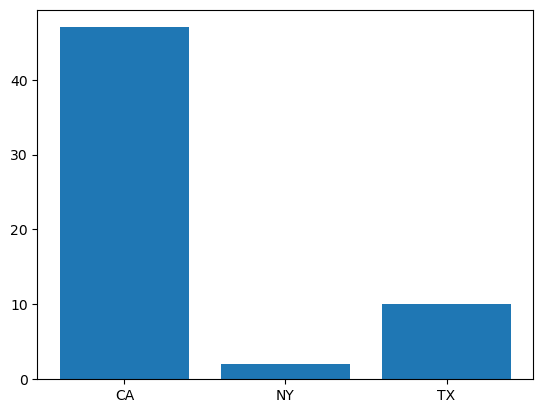

In [39]:
dataset_states = dataset[dataset['State'].isin(['TX','CA','NY'])]
dataset['Electric Vehicle Type'].unique()
dataset_states_BEV = dataset_states[dataset_states['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
dataset_rdy = dataset_states_BEV.pivot_table(values = 'Electric Vehicle Type', index = 'State' ,aggfunc= 'count')
print(dataset_rdy)
plt.bar(x = dataset_rdy.index, height = dataset_rdy['Electric Vehicle Type'])
plt.show()

From this plot we can clearly see that from the chosen 3 states (Texas, California and New York), California has the highest amount of registeres Battery Electric Vehicles